## Toy example Bernouilli

October 8th



In [210]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
import random

$H_0$ : $\theta = 1/2$
$H_1$ : $\theta \neq 1/2 $  


In [354]:
# Settings
epsilon = 0.02 # precision of theta
alpha = 1/(2*epsilon**2) # choose alpha 
nns = 25 # number of n
nreps = 100 # number of simulation
ns = np.logspace(0,6,nns) # n
maxn = int(np.max(ns))

### $\theta = 1/2$

In [355]:
theta0 = 0.5 # true value
p0xs = np.zeros((nreps,nns))
r0xs = np.zeros((nreps,nns))

In [356]:
for rep in range(nreps):
    y = (np.random.rand(maxn) < theta0) # data
    
    for (i,n) in enumerate(ns):
        s = sum(y[1:int(n)])

        # standard posterior
        B10 = 2**n * sc.beta(1+s, 1+n-s)# p(x|H1)/p(x|H0)
        p0x = 1/(1+B10)  # p(H0|x)
        
        # robust posterior - approximate
        alpha_n = 1/(1/alpha + 1/n)
        R10 = 2**alpha_n * sc.beta(1+alpha_n*s/n, 1+alpha_n*(1-s/n))
        r0x = 1/(1+R10)  
        
        
         # robust posterior - exact
        f(p,q) = (r=p.*log(p./q); if length(p)>1; r[p.==0]=0; elseif p==0; r[:]=0; end; r)
        D(p,q) = f(p,q) + f(1-p,1-q) # relative entropy for Bernoulli
        t = [0:n]
        lpt0 = logpdf(Binomial(n,1/2),t) # Binomial(n,1/2)
        lpt1 = -log(n+1)*ones(n+1) # BetaBinomial(n,1,1) = Uniform{0,1,...,n}
        lpE0 = logsumexp(-alpha*D(s/n,t/n) + lpt0)  # log(p(E|H0))
        lpE1 = logsumexp(-alpha*D(s/n,t/n) + lpt1)  # log(p(E|H1))
        E10 = exp(lpE1 - lpE0)
        e0x = 1/(1+E10)  # p(H0|E)

        

        p0xs[rep,i] = p0x
        r0xs[rep,i] = r0x


/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


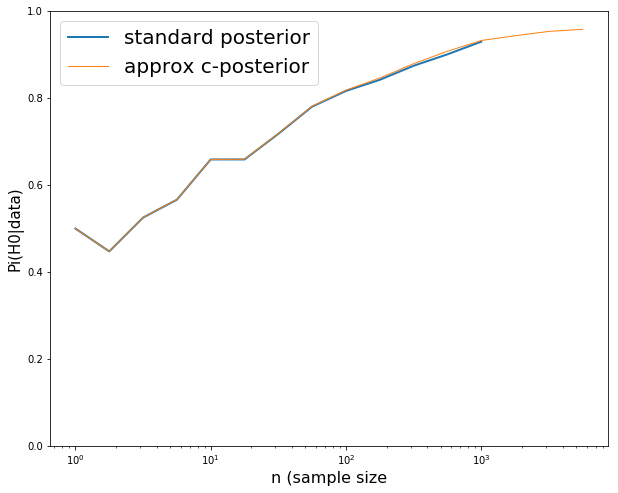

In [357]:
plt.figure(figsize = (10, 8))
plt.semilogx(ns, np.mean(p0xs,0)[:], label="standard posterior",linewidth=2,markersize=5 )
plt.semilogx(ns,np.mean(r0xs,0)[:],label="approx c-posterior",linewidth=1,markersize=5)
plt.ylim(0,1)
plt.legend();
plt.xlabel("n (sample size",fontsize=16)
plt.ylabel("Pi(H0|data)",fontsize=15);
plt.legend(fontsize=20);

### $\theta = 0.51$

In [358]:
theta0 = 0.51
p0xs = np.zeros((nreps,nns))
r0xs = np.zeros((nreps,nns))


for rep in range(nreps):
    y = (np.random.rand(maxn) < theta0) # data
    
    for (i,n) in enumerate(ns):
        s = sum(y[1:int(n)])

        # standard posterior
        B10 = 2**n * sc.beta(1+s, 1+n-s)# p(x|H1)/p(x|H0)
        p0x = 1/(1+B10)  # p(H0|x)
        
        # robust posterior - approximate
        alpha_n = 1/(1/alpha + 1/n)
#         print(alpha_n )
        R10 = 2**alpha_n * sc.beta(1+alpha_n*s/n, 1+alpha_n*(1-s/n))
        r0x = 1/(1+R10)  # p(H0|E)

        p0xs[rep,i] = p0x
        r0xs[rep,i] = r0x
#         print("n =",n)
#         print("p(H0|x)  std=%.4f  approx=%.5f  exact=%.5f\n",p0x,r0x)
        

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


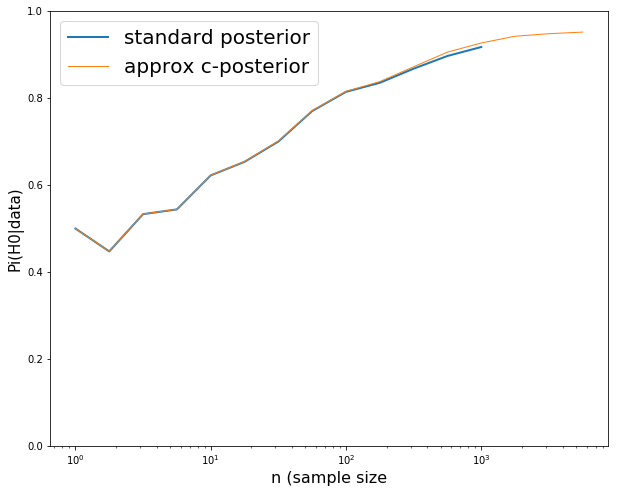

In [359]:
plt.figure(figsize = (10, 8))
plt.semilogx(ns, np.mean(p0xs,0)[:], label="standard posterior",linewidth=2,markersize=5 )
plt.semilogx(ns,np.mean(r0xs,0)[:],label="approx c-posterior",linewidth=1,markersize=5)
plt.ylim(0,1)
plt.legend();
plt.xlabel("n (sample size",fontsize=16)
plt.ylabel("Pi(H0|data)",fontsize=15);
plt.legend(fontsize=20);

### $\theta = 0.55$

In [360]:
theta0 = 0.55
p0xs = np.zeros((nreps,nns))
r0xs = np.zeros((nreps,nns))


for rep in range(nreps):
    y = (np.random.rand(maxn) < theta0) # data
    
    for (i,n) in enumerate(ns):
        s = sum(y[1:int(n)])

        # standard posterior
        B10 = 2**n * sc.beta(1+s, 1+n-s)# p(x|H1)/p(x|H0)
        p0x = 1/(1+B10)  # p(H0|x)
        
        # robust posterior - approximate
        alpha_n = 1/(1/alpha + 1/n)
#         print(alpha_n )
        R10 = 2**alpha_n * sc.beta(1+alpha_n*s/n, 1+alpha_n*(1-s/n))
        r0x = 1/(1+R10)  # p(H0|E)

        p0xs[rep,i] = p0x
        r0xs[rep,i] = r0x
#         print("n =",n)
#         print("p(H0|x)  std=%.4f  approx=%.5f  exact=%.5f\n",p0x,r0x)
        

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


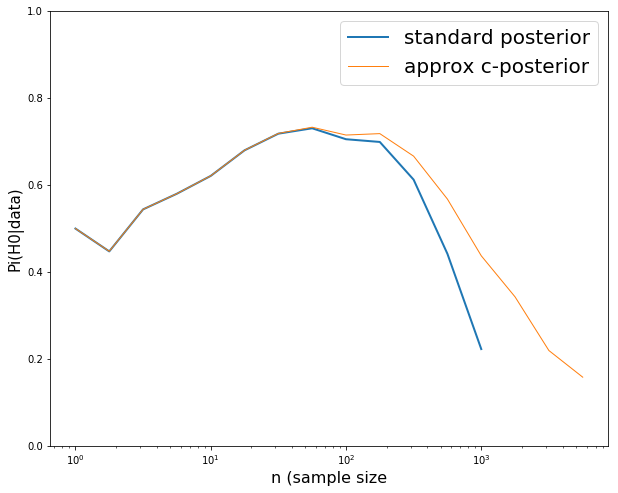

In [361]:
plt.figure(figsize = (10, 8))
plt.semilogx(ns, np.mean(p0xs,0)[:], label="standard posterior",linewidth=2,markersize=5 )
plt.semilogx(ns,np.mean(r0xs,0)[:],label="approx c-posterior",linewidth=1,markersize=5)
plt.ylim(0,1)
plt.legend();
plt.xlabel("n (sample size",fontsize=16)
plt.ylabel("Pi(H0|data)",fontsize=15);
plt.legend(fontsize=20);

# Generate with corrupted data with 2 components Bernouilli

Sum of two Bernouilli. 

In [690]:
theta0 = 0.5 # true value
theta1 = 0.55 # true value

print("meany = ",sum(y)/len(y))

In [698]:
nreps=50
p0xs = np.zeros((nreps,nns))
r0xs = np.zeros((nreps,nns))

In [699]:
for rep in range(nreps):
    a = (np.random.rand(int(maxn//2)) < theta0) 
    b = (np.random.rand(int(maxn//2)) < theta1) 
    y = np.concatenate((a, b)) # data
  
    random.shuffle(y)
    
    for (i,n) in enumerate(ns):
#         print(i)
#         print(n)
#         print(rep)
        s = sum(y[1:int(n)])

        # standard posterior
        B10 =  np.exp(n*np.log(2) + np.log(sc.beta(1+s, 1+n-s))) # p(x|H1)/p(x|H0)
        p0x = 1/(1+B10)  
        
        # robust posterior - approximate
        alpha_n = 1/(1/alpha + 1/n)

        R10 = 2**alpha_n * sc.beta(1+alpha_n*s/n, 1+alpha_n*(1-s/n))
        r0x = 1/(1+R10)  

        p0xs[rep,i] = p0x
        r0xs[rep,i] = r0x

        

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


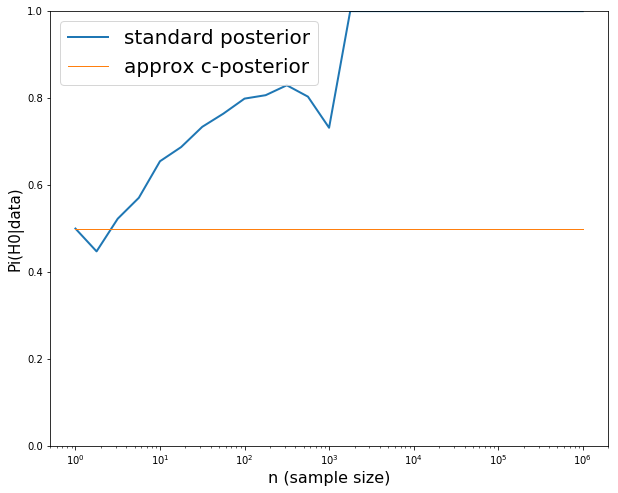

In [700]:
plt.figure(figsize = (10, 8))
plt.semilogx(ns, np.mean(p0xs,0)[:], label="standard posterior",linewidth=2,markersize=5 )
plt.semilogx(ns,np.mean(r0xs,0)[:],label="approx c-posterior",linewidth=1,markersize=5)
plt.ylim(0,1)
plt.legend();
plt.xlabel("n (sample size)",fontsize=16)
plt.ylabel("Pi(H0|data)",fontsize=15);
plt.legend(fontsize=20);
# plt.savefig('figure5.png')

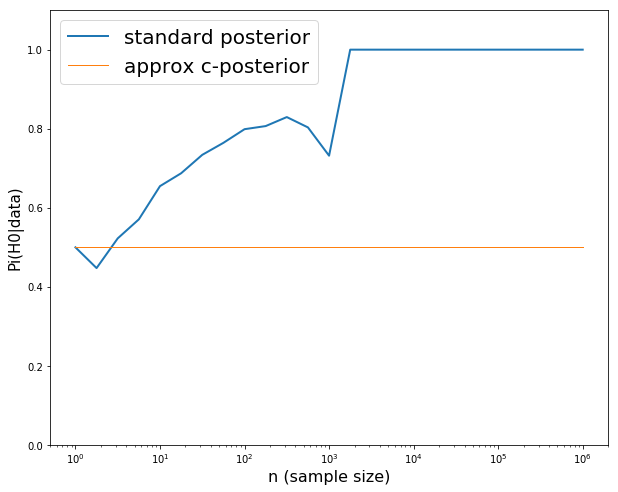

In [702]:
plt.figure(figsize = (10, 8))
plt.semilogx(ns, np.mean(p0xs,0)[:], label="standard posterior",linewidth=2,markersize=5 )
plt.semilogx(ns,np.mean(r0xs,0)[:],label="approx c-posterior",linewidth=1,markersize=5)
plt.ylim(0,1.1)
plt.legend();
plt.xlabel("n (sample size)",fontsize=16)
plt.ylabel("Pi(H0|data)",fontsize=15);
plt.legend(fontsize=20);
plt.savefig('figure7.png')

## Change $\alpha$

## $\epsilon \rightarrow 0 $ 

In [650]:
epsilon = 0.0001 # precision of theta
alpha = 1/(2*epsilon**2) # choose alpha 
nns = 25 # number of n
nreps = 100 # number of simulation
ns = np.logspace(0,6,nns) # n
maxn = int(np.max(ns))

In [651]:
theta0 = 0.55 # true value
p0xs = np.zeros((nreps,nns))
r0xs = np.zeros((nreps,nns))

In [652]:
for rep in range(nreps):
    y = (np.random.rand(maxn) < theta0) # data
    
    for (i,n) in enumerate(ns):
        s = sum(y[1:int(n)])

        # standard posterior
        B10 = 2**n * sc.beta(1+s, 1+n-s)# p(x|H1)/p(x|H0)
        p0x = 1/(1+B10)  # p(H0|x)
        
        # robust posterior - approximate
        alpha_n = 1/(1/alpha + 1/n)
#         print(alpha_n )
        R10 = 2**alpha_n * sc.beta(1+alpha_n*s/n, 1+alpha_n*(1-s/n))
        r0x = 1/(1+R10)  # p(H0|E)

        p0xs[rep,i] = p0x
        r0xs[rep,i] = r0x
#         print("n =",n)
#         print("p(H0|x)  std=%.4f  approx=%.5f  exact=%.5f\n",p0x,r0x)
        

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


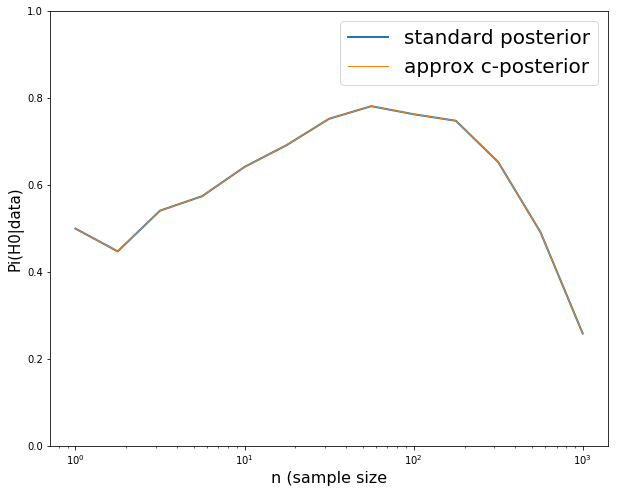

In [653]:
plt.figure(figsize = (10, 8))
plt.semilogx(ns, np.mean(p0xs,0)[:], label="standard posterior",linewidth=2,markersize=5 )
plt.semilogx(ns,np.mean(r0xs,0)[:],label="approx c-posterior",linewidth=1,markersize=5)
plt.ylim(0,1)
plt.legend();
plt.xlabel("n (sample size",fontsize=16)
plt.ylabel("Pi(H0|data)",fontsize=15);
plt.legend(fontsize=20);

## $\epsilon \rightarrow \infty $ 

In [714]:
epsilon = 1000 # precision of theta
alpha = 1/(2*epsilon**2) # choose alpha 
nns = 25 # number of n
nreps = 50 # number of simulation
ns = np.logspace(0,6,nns) # n
maxn = int(np.max(ns))

In [715]:
theta0 = 0.55 # true value
p0xs = np.zeros((nreps,nns))
r0xs = np.zeros((nreps,nns))

In [716]:
for rep in range(nreps):
    y = (np.random.rand(maxn) < theta0) # data
    
    for (i,n) in enumerate(ns):
        s = sum(y[1:int(n)])

        # standard posterior
        B10 = np.exp(n*np.log(2) + np.log(sc.beta(1+s, 1+n-s))) # p(x|H1)/p(x|H0)
        p0x = 1/(1+B10)  # p(H0|x)
        
        # robust posterior - approximate
        alpha_n = 1/(1/alpha + 1/n)
#         print(alpha_n )
        R10 = 2**alpha_n * sc.beta(1+alpha_n*s/n, 1+alpha_n*(1-s/n))
        r0x = 1/(1+R10)  # p(H0|E)

        p0xs[rep,i] = p0x
        r0xs[rep,i] = r0x
#         print("n =",n)
#         print("p(H0|x)  std=%.4f  approx=%.5f  exact=%.5f\n",p0x,r0x)
        

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


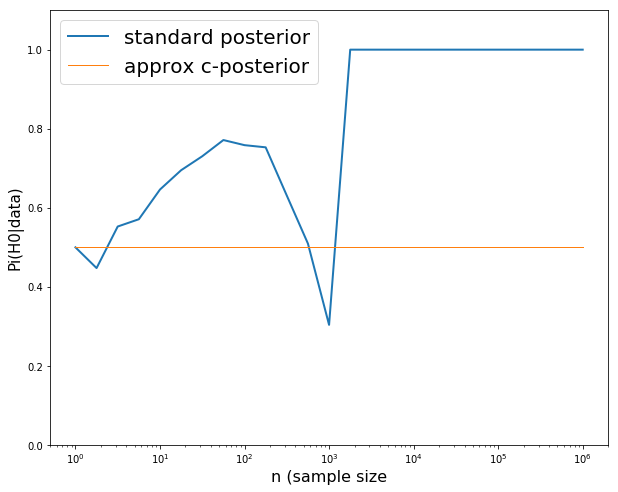

In [717]:
plt.figure(figsize = (10, 8))
plt.semilogx(ns, np.mean(p0xs,0)[:], label="standard posterior",linewidth=2,markersize=5 )
plt.semilogx(ns,np.mean(r0xs,0)[:],label="approx c-posterior",linewidth=1,markersize=5)
plt.ylim(0,1.1)
plt.legend();
plt.xlabel("n (sample size",fontsize=16)
plt.ylabel("Pi(H0|data)",fontsize=15);
plt.legend(fontsize=20);
plt.savefig('figure8.png')

## Heavy tail exp

## ABC posterior

In [718]:
epsilon = 0.2 
nreps=100
## truth 
n, p = 1, .5 
size = 100
X = np.random.binomial(n, p, size)

In [726]:
## generate data with p = 
pg = .50
prob = np.linspace(0.4, 0.6, 10)

In [728]:
for i, pg in enumerate(prob):
    eps= np.linspace(0,0.5, 100)
    d1x = np.zeros((nreps, len(prob)))
    d2x = np.zeros((nreps))
    epsilon = 0.1


    for rep in range(nreps):
        x = np.random.binomial(1, pg, size)
    #     for (i,n) in enumerate(eps):
        d1 = 2*np.abs(np.mean(x)-np.mean(X))
    #         
    #     d2 = (1-np.mean(x))*np.log((1-np.mean(x))/((1-np.mean(X)))) + (np.mean(x))*np.log((np.mean(x))/((np.mean(X)))) 
        d1x[rep,i] = d1<epsilon
    #     d2x[rep] = d2<epsilon
    
    


1.0